# CV Project: Deep Learning for Camera Pose Estimation: A Comparative Study on 7-Scenes (beta=50.0)

In [1]:
# demo.ipynb

import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt

from train import train
from eval import evaluate
from geometry_baseline import run_baseline

DATA_ROOT = "/Users/zhengbinheng/Desktop/7-scenes-dataset"  
OUT_DIR = "runs/posenet_chess"
CKPT_PATH = os.path.join(OUT_DIR, "best.ckpt")
RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)


In [2]:
args = argparse.Namespace(
    data_root=DATA_ROOT,
    scene="chess",
    epochs=30,
    batch_size=32,
    lr=1e-4,
    beta=50.0,
    out=OUT_DIR
)
train(args)  # best.ckpt + loss


/opt/anaconda3/envs/node2/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[1/30] avg_loss = 12.0458
[2/30] avg_loss = 2.8748
[3/30] avg_loss = 2.2960
[4/30] avg_loss = 1.9752
[5/30] avg_loss = 1.6200
[6/30] avg_loss = 1.4007
[7/30] avg_loss = 1.3027
[8/30] avg_loss = 1.2251
[9/30] avg_loss = 1.1558
[10/30] avg_loss = 1.0311
[11/30] avg_loss = 1.0133
[12/30] avg_loss = 0.9534
[13/30] avg_loss = 0.9092
[14/30] avg_loss = 0.8619
[15/30] avg_loss = 0.8437
[16/30] avg_loss = 0.7976
[17/30] avg_loss = 0.7662
[18/30] avg_loss = 0.7788
[19/30] avg_loss = 0.7320
[20/30] avg_loss = 0.6849
[21/30] avg_loss = 0.7028
[22/30] avg_loss = 0.7248
[23/30] avg_loss = 0.7277
[24/30] avg_loss = 0.6845
[25/30] avg_loss = 0.6670
[26/30] avg_loss = 0.6473
[27/30] avg_loss = 0.6861
[28/30] avg_loss = 0.6155
[29/30] avg_loss = 0.6432
[30/30] avg_loss = 0.5861
Training finished. Best loss = 0.5861
Results saved in runs/posenet_chess


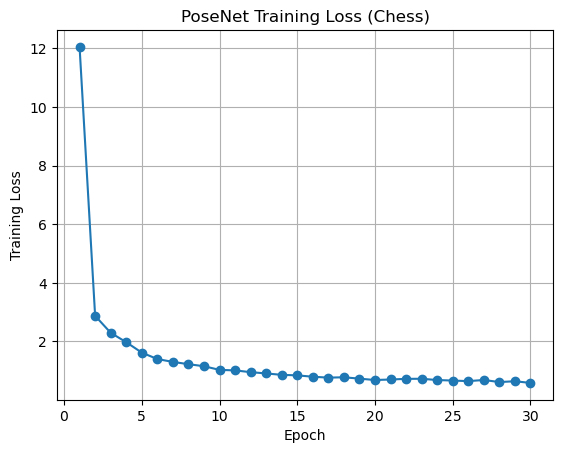

In [3]:
df_loss = pd.read_csv(os.path.join(OUT_DIR, "loss_curve.csv"))
plt.plot(df_loss["epoch"], df_loss["loss"], marker="o")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("PoseNet Training Loss (Chess)")
plt.grid(True)
plt.show()


In [4]:
def run_eval(scene):
    args = argparse.Namespace(
        data_root=DATA_ROOT,
        scene=scene,
        ckpt=CKPT_PATH,
        out=os.path.join(RESULTS_DIR, f"{scene}_posenet.csv")
    )
    stats, df = evaluate(args)
    return stats, df

scenes = ["chess", "fire", "heads"]

pose_stats, pose_perframe = {}, {}
for s in scenes:
    stats, df = run_eval(s)
    pose_stats[s] = stats
    pose_perframe[s] = df


[PoseNet | chess] mean_t=0.180 m | median_t=0.138 m || mean_r=5.51° | median_r=4.94°
[PoseNet | fire] mean_t=0.936 m | median_t=0.948 m || mean_r=38.76° | median_r=33.76°
[PoseNet | heads] mean_t=0.879 m | median_t=0.845 m || mean_r=47.72° | median_r=46.52°


In [5]:
summary = pd.DataFrame([
    {
        "Scene": s,
        "PoseNet mean_t (m)": pose_stats[s]["mean_t"],
        "PoseNet median_t (m)": pose_stats[s]["median_t"],
        "PoseNet mean_r (°)": pose_stats[s]["mean_r"],
        "PoseNet median_r (°)": pose_stats[s]["median_r"],
    }
    for s in scenes
])

summary.round(3)


,Scene,PoseNet mean_t (m),PoseNet median_t (m),PoseNet mean_r (°),PoseNet median_r (°)
0,chess,0.180,0.138,5.508,4.945
1,fire,0.936,0.948,38.758,33.758
2,heads,0.879,0.845,47.716,46.523
